# 利用Pandas直接绘制堆积图

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

* 如何解决图形中不能出现中文字体的问题

In [110]:
# 解决绘图中文乱码问题
# 但是在出现中文的地方记得加个 u
plt.rcParams['font.sans-serif'] = ['SimHei'] #指定默认字体    
plt.rcParams['axes.unicode_minus'] = False #解决保存图像是负号'-'显示为方块的问题  

In [46]:
dt.head()

,prcidnormalscoreexp3v2,city_idx,bidnormalscoreexp3v2
1,20.0,3.0,20.0
10,18.0,1.0,18.0
29,18.0,1.5,18.0
34,18.0,1.5,18.0
39,18.0,1.5,18.0


In [95]:
df1_group=df1.groupby('city_idx')
df2=df1_group[['prcidnormalscoreexp3v2','bidnormalscoreexp3v2']].count()
df2

,prcidnormalscoreexp3v2,bidnormalscoreexp3v2
city_idx,,
1.0,1094,635
1.5,1966,1387
2.0,1856,1251
3.0,2075,1362
4.0,2306,1649
5.0,1709,1087


In [298]:
# 利用div函数快速计算占比，axis=0表示按行计算
df2.div(df2.sum(1),axis=0)

,prcidnormalscoreexp3v2,bidnormalscoreexp3v2
city_idx,,
1.0,0.632736,0.367264
1.5,0.586341,0.413659
2.0,0.597361,0.402639
3.0,0.603724,0.396276
4.0,0.583059,0.416941
5.0,0.611230,0.388770


# 利用Pandas画堆积图

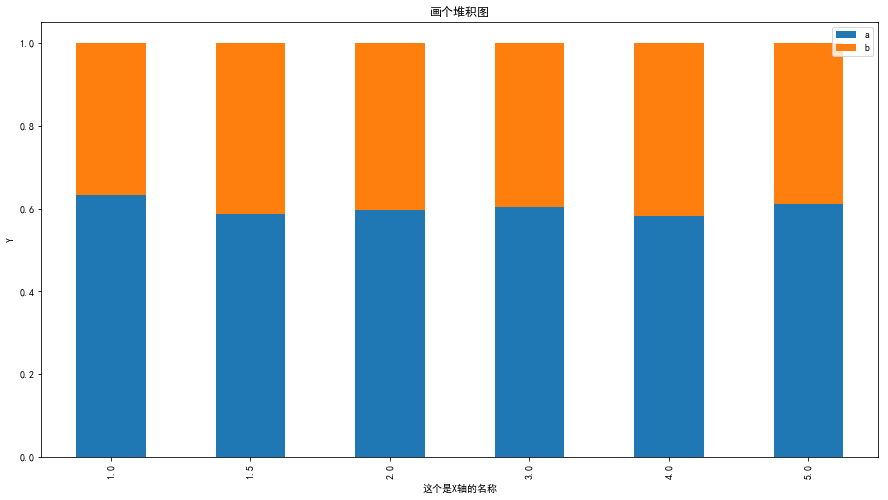

In [263]:
# 利用pandas作图
# stacked表示画堆积图

df2.div(df2.sum(1),axis=0).plot(kind='bar', stacked=True ,figsize=(15, 8))
# plt.legend(loc='best')
# 中文前加u可以避免中文报错
plt.title(u'画个堆积图')
plt.xlabel(u'这个是X轴的名称')
plt.ylabel(u'Y')
plt.legend(['a','b'],loc="upper right")


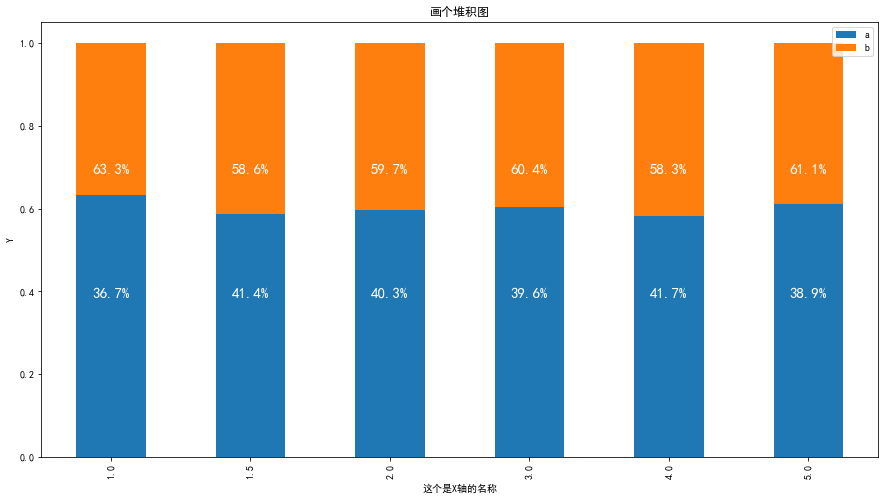

In [296]:
df2.div(df2.sum(1),axis=0).plot(kind='bar', stacked=True ,figsize=(15, 8))
# plt.legend(loc='best')
# 中文前加u可以避免中文报错
plt.title(u'画个堆积图')
plt.xlabel(u'这个是X轴的名称')
plt.ylabel(u'Y')
plt.legend(['a','b'],loc="upper right")

# 添加的数字
c=df2.div(df2.sum(1),axis=0)['bidnormalscoreexp3v2'].values.tolist()
d=df2.div(df2.sum(1),axis=0)['prcidnormalscoreexp3v2'].values.tolist()

# 数字位置
x=range(6)
y=[0.38]*len(x)

# 文字类型设置
font = {'family': 'sans-serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 15,
        'color':'w',
        'fontsize':15
        }

# 循环添加
for a,b in zip(x,y):
    plt.text(a,b, '{:.1%}'.format(c[x.index(a)]) ,ha='center', va= 'bottom',fontdict=font)

for a,b in zip(x,y):
    plt.text(a,b+0.3, '{:.1%}'.format(d[x.index(a)]) ,ha='center', va= 'bottom',fontdict=font)

    
#text(x, y, s, fontsize=12)


> 说明：axis=0 表示按行除

> dataframe 通过图形参数figsize控制图形大小

# 补充一点

In [86]:
# dataframe 按列加
print df2.sum(0)

# dataframe 按行加
print df2.sum(1)

prcidnormalscoreexp3v2     11006.0
bidnormalscoreexp3v2        7371.0
total                     312409.0
dtype: float64
city_idx
1.0    31122.0
1.5    60354.0
2.0    55926.0
3.0    61866.0
4.0    71190.0
5.0    50328.0
dtype: float64


In [90]:
# 行列添加Total值
pd.concat([df2,pd.DataFrame(df2.sum(0)).T],ignore_index=False)

,prcidnormalscoreexp3v2,bidnormalscoreexp3v2,total
1.0,1094.0,635.0,29393.0
1.5,1966.0,1387.0,57001.0
2.0,1856.0,1251.0,52819.0
3.0,2075.0,1362.0,58429.0
4.0,2306.0,1649.0,67235.0
5.0,1709.0,1087.0,47532.0
0.0,11006.0,7371.0,312409.0
